<a href="https://colab.research.google.com/github/Mahjabeenqamar1/Data_Science_Assingment/blob/main/Heart_EDA_Final_Ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Heart Disease Dataset


* Import the library's
* Read the data 
* Perform the EDA
* Data Preprocessing
* Data Normarlization
* Data Train, Test, Spliting
* Fit the different Model like SVC, Randomforestclassifier Naive bayes
* Accuracy
* Confusion_Matrix
* Heat_map

There are different models is implement and good results for show in confusion matrix and heatmap











# Import the library's

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances

In [199]:
#Resd the CSV file 
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [200]:
#Remove the NAN values
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [201]:
df.target.value_counts().index

Int64Index([1, 0], dtype='int64')

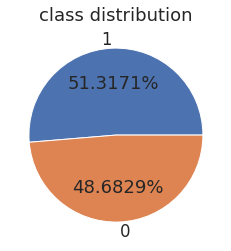

In [202]:
# ploting the pic chart
plt.pie(df.target.value_counts().values , labels=df.target.value_counts().index,autopct='%1.4f%%')
plt.title('class distribution' , loc='center')
plt.show()

In [203]:
print ('*'*10,'Dataset Information','*'*10)
print(df.info())

********** Dataset Information **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


# There are many bar & pie charts is show

In [204]:

def feature_plot(feature_name):

 FT_value=df[feature_name].value_counts().values
 FT_index=df[feature_name].value_counts().index

 plt.figure(figsize=(15,5))
 plt.style.use('seaborn-dark-palette')
 plt.suptitle('*'*10+'distrib of categorical feature : {}'.format(feature_name)+'*'*10 , fontweight='heavy')
##### pie chart ####
 plt.subplot(1,2,1)
 plt.pie(FT_value , labels=FT_index,autopct='%1.1f%%')
 plt.title('pie chart')


###### bar plot  ####
 plt.subplot(1,2,2)
 plt.bar(x=FT_index,height=FT_value,color=['yellow','red','green','pink','blue'])
 plt.xticks(FT_index)
 plt.title('bar chart')

[None, None, None, None, None, None, None, None]

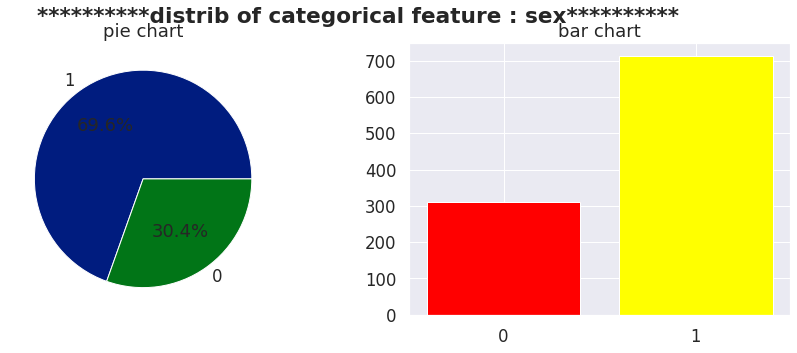

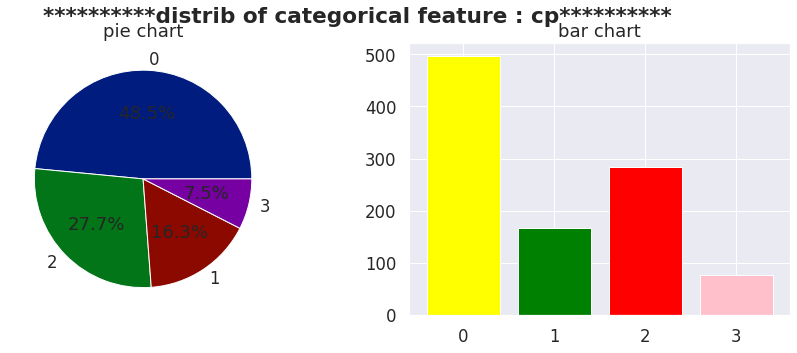

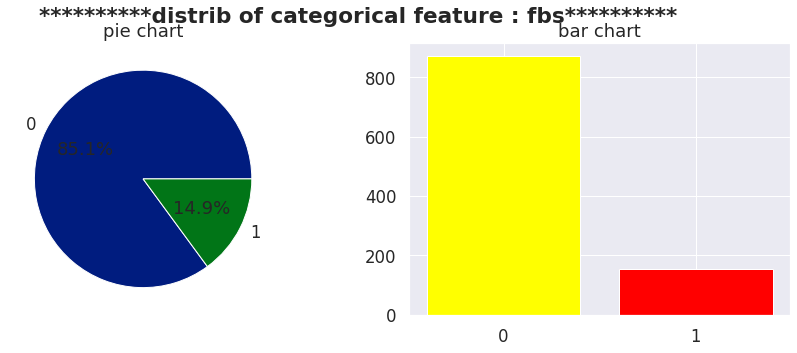

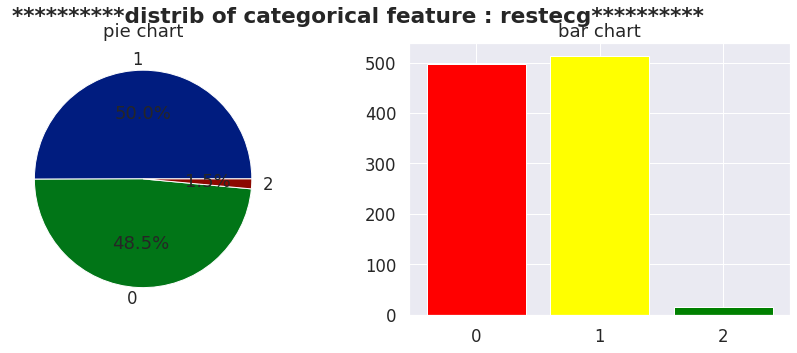

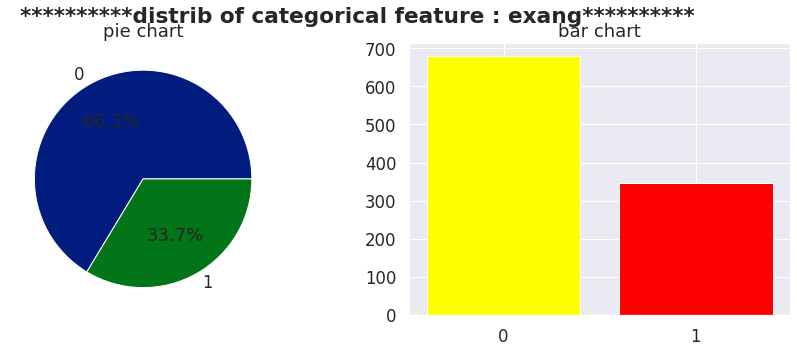

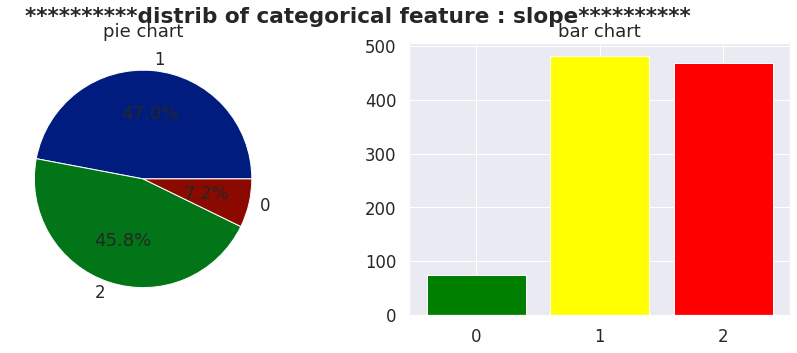

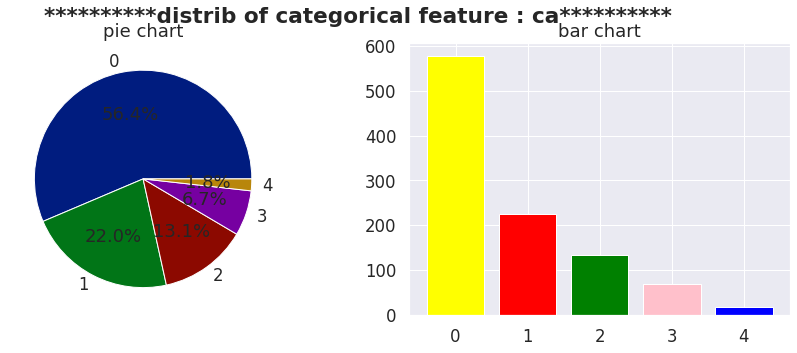

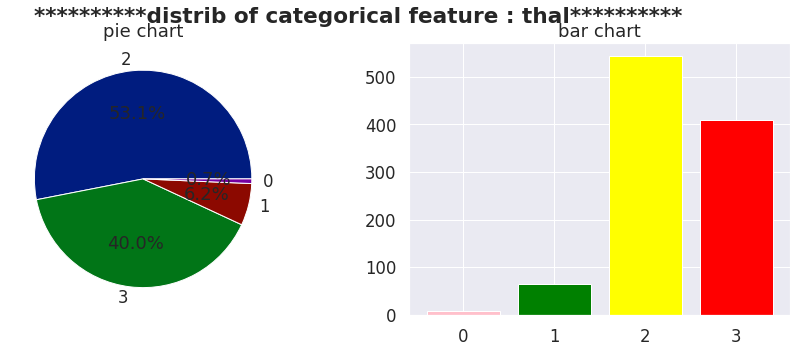

In [205]:
features=['sex','cp','fbs','restecg','exang','slope' ,'ca','thal' ]
list(map(feature_plot,features))

In [206]:
numerical=['age','trestbps', 'chol' , 'thalach','oldpeak']
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [207]:
def plot_numeri_dist(f_name):
    plt.figure(figsize=(15,5))
    plt.suptitle('*'*10+'distribution of numerical feature : {}'.format(f_name)+'*'*10 , fontweight='black')
    plt.style.use('seaborn-dark-palette')
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=f_name , kde=True )
    
    plt.subplot(1,2,2)
    sns.boxenplot(data=df , x=f_name,linewidth=1.5)

[None, None, None, None, None]

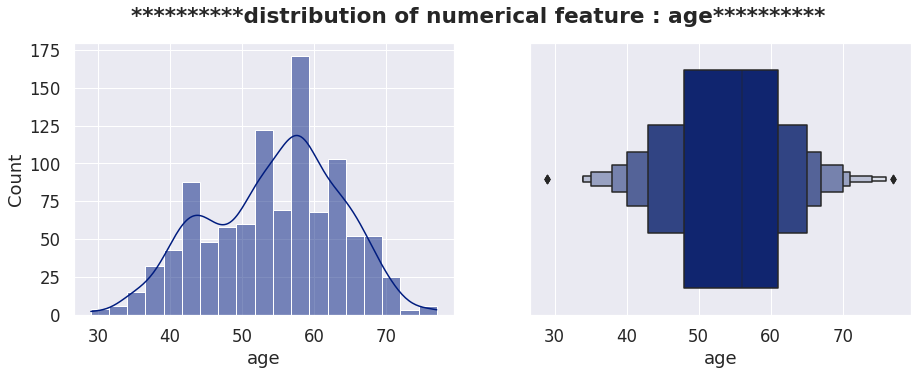

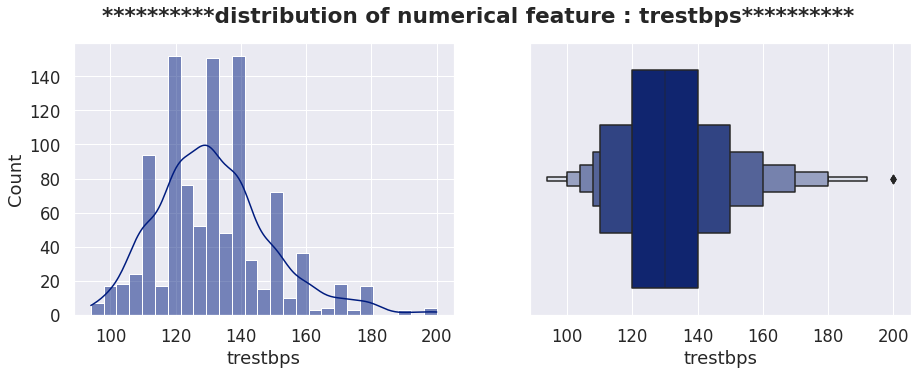

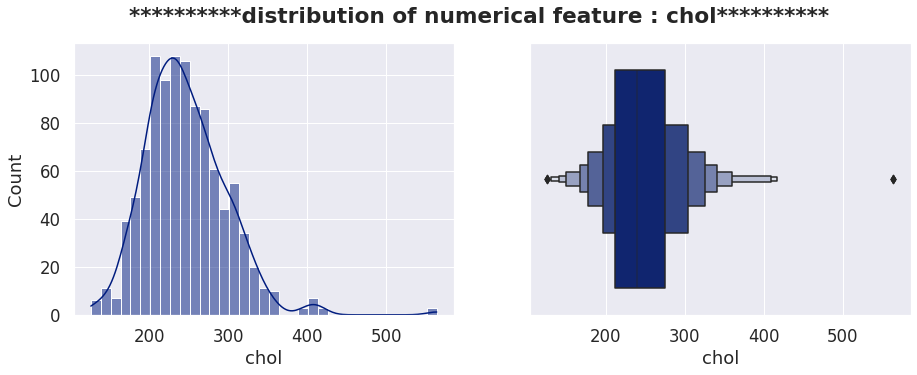

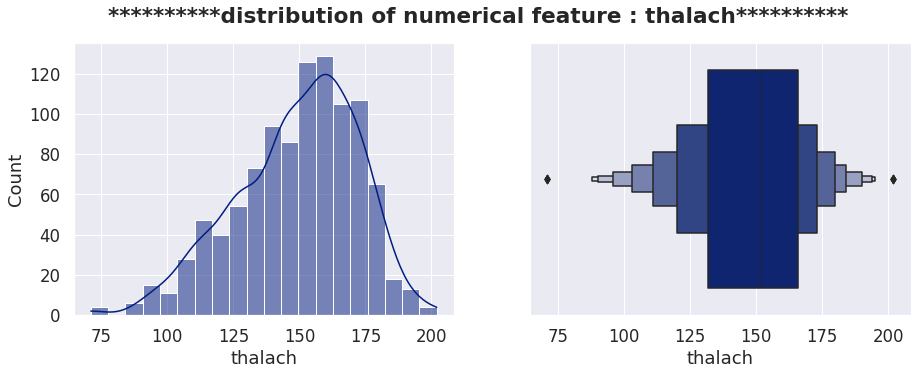

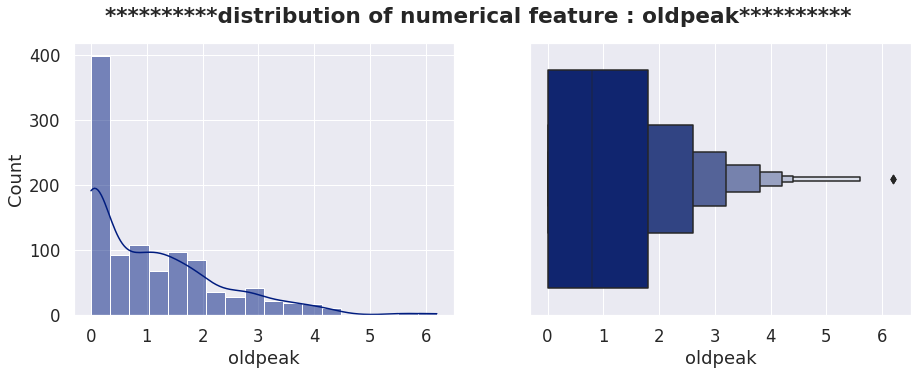

In [208]:
list(map(plot_numeri_dist,numerical))

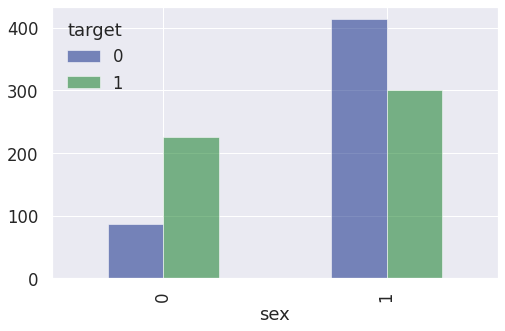

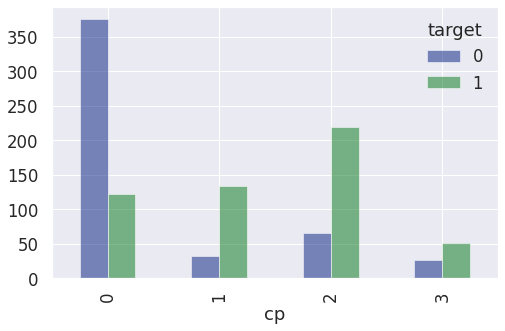

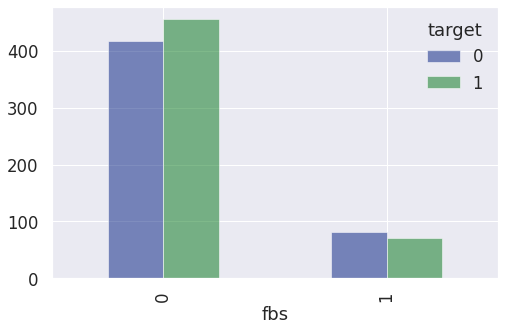

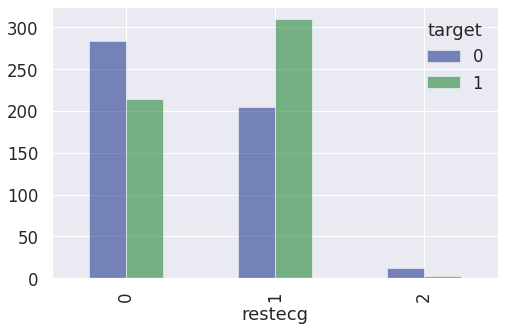

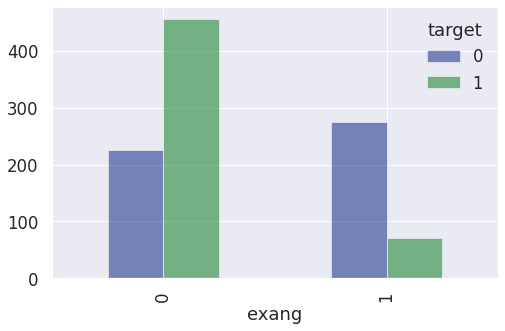

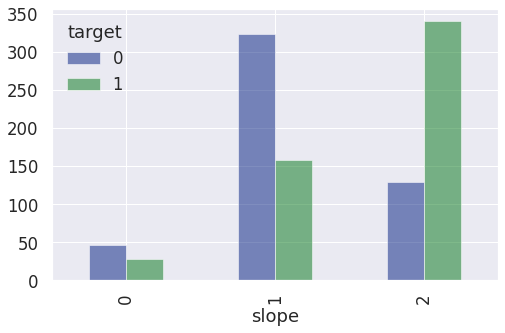

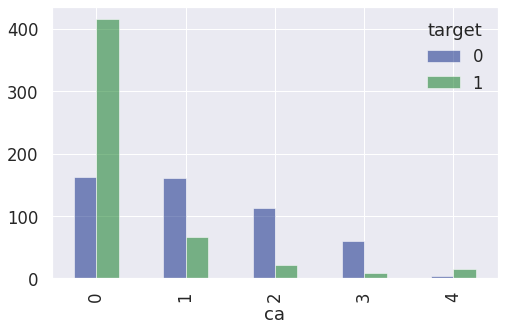

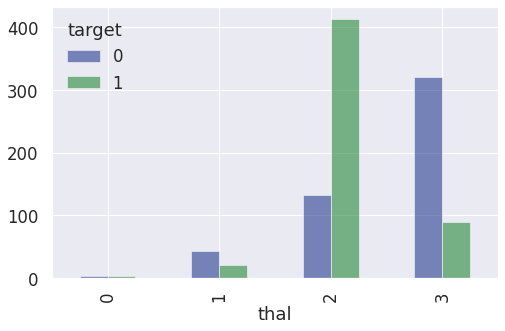

In [209]:


for pol in features :
 pd.crosstab(df[pol], df.target).plot(kind='bar', figsize=(8, 5), alpha=0.50)

In [210]:
Target=numerical.append('target')

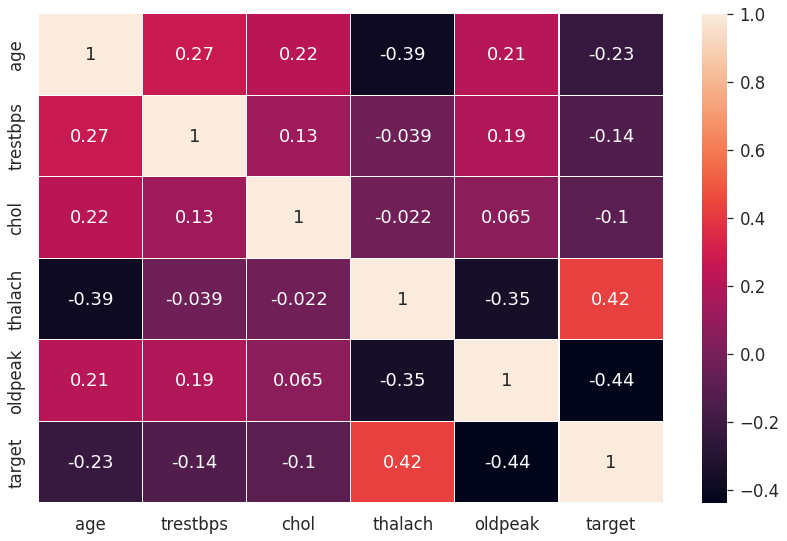

In [211]:
# Show the heat_mat
plt.figure(figsize=(14, 9))
sns.heatmap(df[numerical].corr(), annot=True, linewidths=0.1)

In [212]:
#data preprocessing
cp = pd.get_dummies(df['cp'], prefix='cp')
restecg = pd.get_dummies(df['restecg'], prefix='restecg')
slope = pd.get_dummies(df['slope'], prefix='slope')
ca = pd.get_dummies(df['ca'], prefix='ca')
thal = pd.get_dummies(df['thal'], prefix='thal')

In [213]:
df.drop(columns=['cp','restecg', 'thal','ca', 'slope'] , inplace=True)
frames = [df, cp,restecg, thal,ca, slope]
df = pd.concat(frames, axis = 1)

In [214]:
X=df.drop(columns='target')
y=df['target']

In [215]:
#data normarlization
scalers=MinMaxScaler()
X=scalers.fit_transform(X)

# Logistic Regression Learning Curve

In [216]:
def plot_LearningCurv(model):
  log = LearningCurve(model,  title='Logistic Regression Learning Curve')
  log.fit(X_train, y_train)
  log.finalize() 

In [217]:
def plot_RoC(model):
 logrocauc = ROCAUC(model, classes=['False', 'True'],
 title='Logistic Regression ROC AUC Plot')
 logrocauc.fit(X_train, y_train)
 logrocauc.score(X_test, y_test)
 logrocauc.finalize()
 plt.show()

In [218]:
#Data is spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)


# Naive_bayes Model

.:. NB  Accuracy: 82.9% .:.


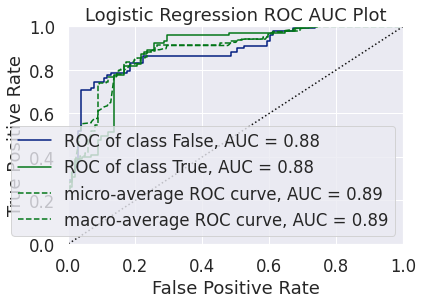

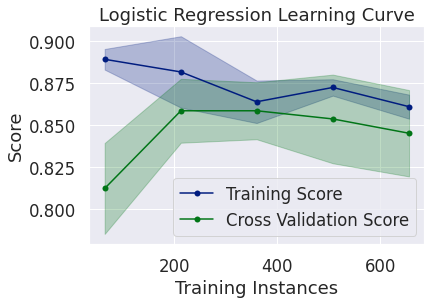

In [219]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB(var_smoothing=0.08)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('.:. NB  Accuracy:'+'\033[1m {:.1f}%'.format(acc*100)+' .:.')
plot_RoC(model)
plot_LearningCurv(model)

Support Vector Classifier Model

.:. SVM Neighbour Accuracy: 89.27% .:.


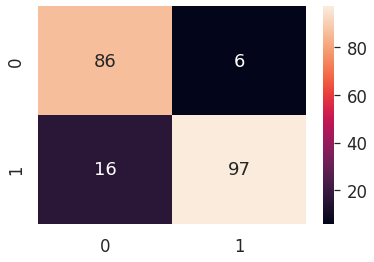

In [220]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
model=SVC(probability=True)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
SVMacc = accuracy_score(y_pred, y_test)
print('.:. SVM Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(SVMacc*100)+' .:.')
# plot_RoC(svm_model)
# plot_LearningCurv(svm_model)
sns.set(font_scale=1.5)
Confusion_Matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(Confusion_Matrix, annot=True, fmt="g")
plt.show()

# RandomForestClassifier Model

Random Forest accuracy score is: 98.53658536585365


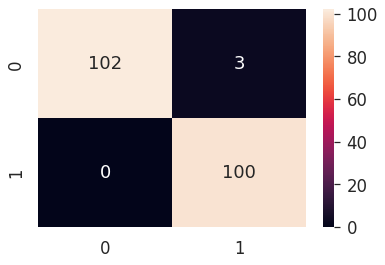

In [221]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)
y_pred = model_RFC.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred)*100
print(f"Random Forest accuracy score is: {Accuracy}")

sns.set(font_scale=1.5)
Matirx = confusion_matrix(y_pred, y_test)
sns.heatmap(Matirx, annot=True, fmt="g")
plt.show()